In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
data = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

1.Age: age of the patient [years]

2.Sex: sex of the patient [M: Male, F: Female]

3.ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4.RestingBP: resting blood pressure [mm Hg]
    (안정 혈압)

5.Cholesterol: serum cholesterol [mm/dl]
    (0 is impossible)

6.FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    (공복 혈당)

7.RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite     left ventricular hypertrophy by Estes' criteria]
    (심전도)

8.MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    (최대 혈압)

9.ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    (운동으로 유발된 협심증 유무)

10.Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ()

11.ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.HeartDisease: output class [1: heart disease, 0: Normal]

그래프는 tebleau 로 하고
결측치, 이상치 탐색

In [3]:
#결측치 
print(data.isna().sum(), "\n")
print(data.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [4]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [6]:
data[num_cols].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


<AxesSubplot:>

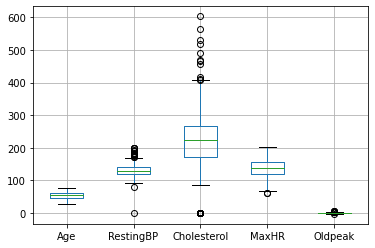

In [7]:
data.boxplot(num_cols)

In [8]:
# Resting BP, Cholesterol 이 0일 수 없으므로 중앙값으로 변경
data.loc[data['RestingBP'] ==0,'RestingBP']  = data['RestingBP'].median()

# Cholesterol 에서 심장병이 있는사람이 0인 경우가 많은데 다른 방법으로 변경 필요 
data.loc[data['Cholesterol'] ==0,'Cholesterol']  = data['Cholesterol'].median()


In [9]:
print(data[data['RestingBP'] ==0]['RestingBP'])
print(data[data['Cholesterol'] ==0]['Cholesterol'])


Series([], Name: RestingBP, dtype: int64)
Series([], Name: Cholesterol, dtype: int64)


In [10]:
def outlier_find(data,num_cols_list):
    out_lier_indexs = []
    
    for num_col in num_cols_list :
        out_lier_index = []
        Q1 = np.percentile(data[num_col], 25)
        Q3 = np.percentile(data[num_col], 75)
        
        IQR = Q3-1
        
        lower_bound = Q1 - IQR*1.5
        upper_bound = Q3 + IQR*1.5
        
        out_lier_index_list = data[(data[num_col]<lower_bound )| (data[num_col]>upper_bound)].index
        out_lier_index.extend(out_lier_index_list)
        out_lier_indexs.append(out_lier_index)
        
    o_data = pd.DataFrame(
        {
            'num_cols' : num_cols_list,
            'out_lier_index' : out_lier_indexs
        }
    )
    return(o_data)

In [11]:
len(data)

918

In [12]:
o_list = outlier_find(data, num_cols)
print(o_list)
print(len(o_list.loc[4,'out_lier_index']))

      num_cols                                     out_lier_index
0          Age                                                 []
1    RestingBP                                                 []
2  Cholesterol                                                 []
3        MaxHR                                                 []
4      Oldpeak  [19, 23, 26, 68, 111, 140, 141, 142, 155, 166,...
101


<AxesSubplot:>

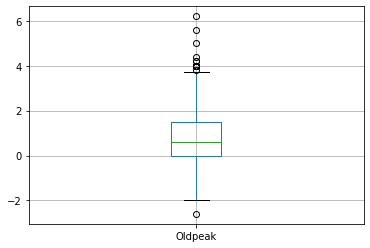

In [13]:
data.boxplot('Oldpeak')

min-max 정규화

In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
data['Oldpeak']

0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916    0.0
917    0.0
Name: Oldpeak, Length: 918, dtype: float64

In [16]:
minmax = MinMaxScaler()
scaled_num_data = minmax.fit_transform(data[num_cols])
scaled_num_data = pd.DataFrame(scaled_num_data, columns= num_cols)

<AxesSubplot:>

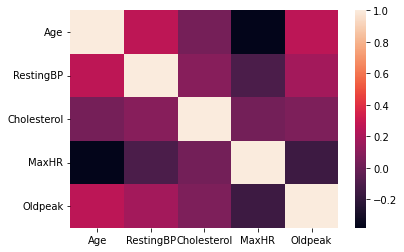

In [17]:
import seaborn as sns
sns.heatmap(scaled_num_data.corr())

In [18]:
obj_data = data.drop(num_cols, axis = 1).copy()
obj_cols = obj_data.columns
obj_data = pd.get_dummies(obj_data)
    
scaled_data = pd.concat([scaled_num_data,obj_data],axis = 1)

In [19]:
obj_data

,FastingBS,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [20]:
scaled_data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.788732,0.295455,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.666667,0.183398,0.676056,0.409091,0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.416667,0.382239,0.267606,0.295455,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.483333,0.249035,0.338028,0.465909,0,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.583333,0.212355,0.436620,0.295455,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250000,0.345560,0.507042,0.431818,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,0.816327,0.533333,0.208494,0.570423,0.681818,1,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.591837,0.416667,0.088803,0.387324,0.431818,0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.591837,0.416667,0.291506,0.802817,0.295455,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


<AxesSubplot:>

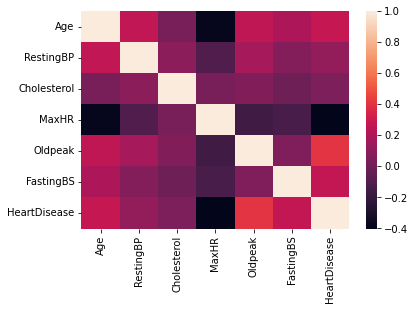

In [21]:
import seaborn as sns
sns.heatmap(scaled_data.iloc[:,0:7].corr())

In [22]:
scaled_data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

모형

In [23]:
from sklearn.model_selection import train_test_split

x = scaled_data.drop('HeartDisease', axis = 1).copy()
y = scaled_data['HeartDisease'].copy()

train_x, test_x, train_y, test_y = train_test_split(x, y)

In [24]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(688, 20)
(688,)
(230, 20)
(230,)


random forest

In [25]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(train_x, train_y)



LogisticRegression()

In [26]:
logit_model.score(train_x, train_y)

0.8633720930232558

In [27]:
logit_model.score(test_x, test_y)

0.8782608695652174